In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
X_train = np.load('./X_train.npy')
y_train = np.load('./y_train_fixed.npy')
X_test = np.load('./X_test.npy')
y_test = np.load('./y_test_fixed.npy')

Best params: {'max_depth': 3, 'n_estimators': 100}
Best CV accuracy: 0.36888888888888893
Test Accuracy: 0.379


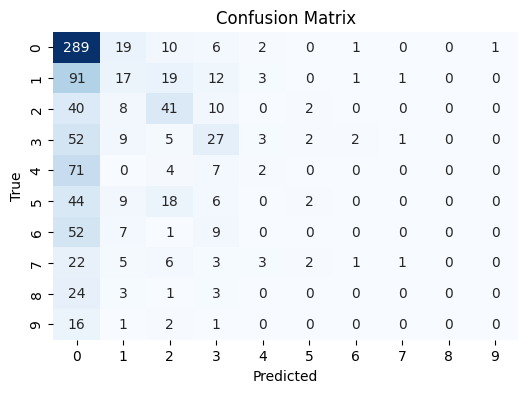

In [11]:
xgb = XGBClassifier()
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7]}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

# Accuracy
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
